In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

zipcodes = gpd.read_file('zipcode.geojson')
neighs = gpd.read_file('Maryland_Baltimore_City_Neighborhoods.geojson')
mhinc = pd.read_csv('MASTER_MERGED.csv')
covid = pd.read_csv('COVID_Cleaned_Transposed.csv')

sjoined = gpd.sjoin(neighs, zipcodes, how='inner',op='intersects')

sjoined.to_csv('spatialJoin.csv')

In [2]:
sjoined = sjoined[['LABEL','zipcode1']]
sjoined = sjoined.rename(columns={'LABEL':'Neigh','zipcode1':'Zip Code'})
mhinc = mhinc[['Neigh','CSA','MHINC','Pop2010']]

merged = pd.merge_ordered(mhinc, sjoined, fill_method='none')
#print(merged[['CSA','Pop2010']])
merged['Zip Code'] = merged['Zip Code'].astype(int)
merged = merged.sort_values(by=['Zip Code'])
print(merged.head())

            Neigh                                    CSA     MHINC  Pop2010  \
852     Poppleton  Poppleton/The Terraces/Hollins Market   20365.8     5086   
668  Mount Vernon                                Midtown   52477.2    15020   
31   Barre Circle             Washington Village/Pigtown   48273.2     5503   
33   Barre Circle             Washington Village/Pigtown   48273.2     5503   
762     Otterbein              Inner Harbor/Federal Hill  100932.2    12855   

     Zip Code  
852     21201  
668     21201  
31      21201  
33      21201  
762     21201  


In [3]:
incomeMeans = []
popSums = []
zipsList = [21227,21207,21230,21251,21229,21237,21287,21231,21226,21206,21222,21225,21211,21208,\
            21205,21218,21234,21202,21201,21213,21210,21209,21216,21236,21217,21224,21215,21212,\
                21223,21214,21239,21228]

zipsList.sort()

for zipcode in zipsList: 
    df1 = merged[merged['Zip Code'] == zipcode]
    incMean = df1['MHINC'].unique().mean()
    popSum = df1['Pop2010'].unique().sum()
    incomeMeans.append(incMean)
    popSums.append(popSum)

In [4]:
latestCases = pd.DataFrame()

covid = covid.sort_values(by=['Zip Code'])
latestCases['Zip Code'] = covid['Zip Code'].astype(int)
latestCases['MHINC'] = incomeMeans
latestCases['Pop2010'] = popSums
latestCases['TotalCases'] = covid.iloc[:,-1].astype(int)

latestCases.to_csv('Zip_MHINC_Pop.csv')

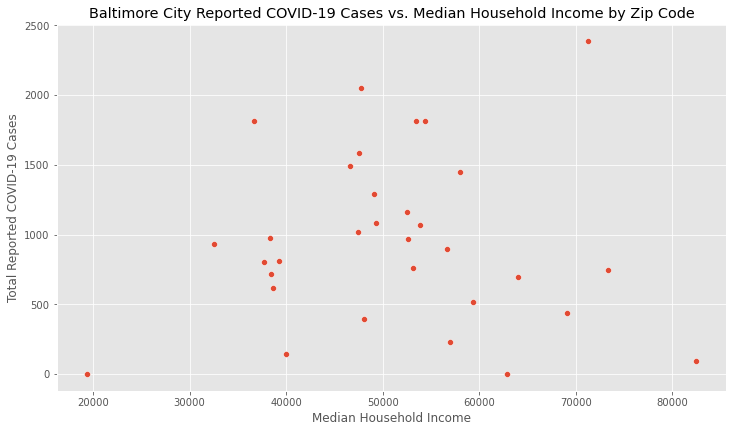

[[1.         0.01775178]
 [0.01775178 1.        ]]


In [5]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='MHINC',y='TotalCases',data=latestCases,legend=False)
_ = plt.xlabel('Median Household Income')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Median Household Income by Zip Code')
plt.show()

corr = np.corrcoef(latestCases[['MHINC','TotalCases']],rowvar=False)
print(corr)

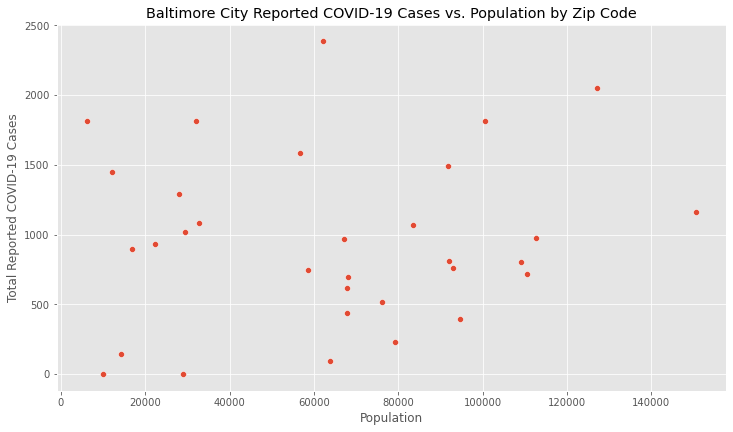

[[1.         0.10279733]
 [0.10279733 1.        ]]


In [6]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=latestCases,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Population by Zip Code')
plt.show()

corr = np.corrcoef(latestCases[['Pop2010','TotalCases']],rowvar=False)
print(corr)

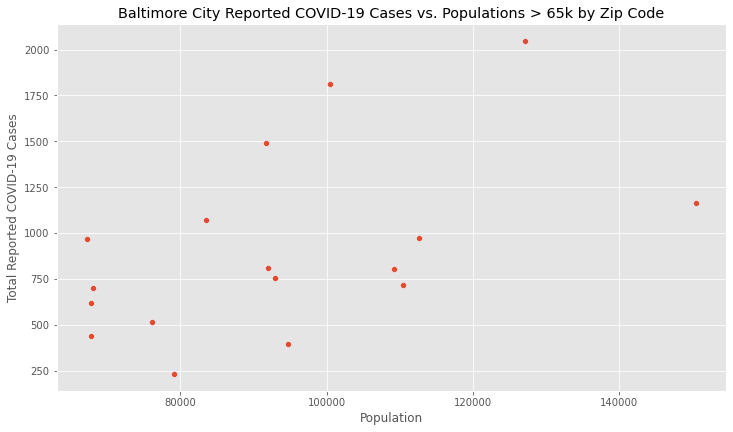

[[1.         0.50575356]
 [0.50575356 1.        ]]


In [7]:
pops_greater_65k = latestCases[latestCases['Pop2010'] > 65000]

_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=pops_greater_65k,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Populations > 65k by Zip Code')
plt.show()

corr = np.corrcoef(pops_greater_65k[['Pop2010','TotalCases']],rowvar=False)
print(corr)

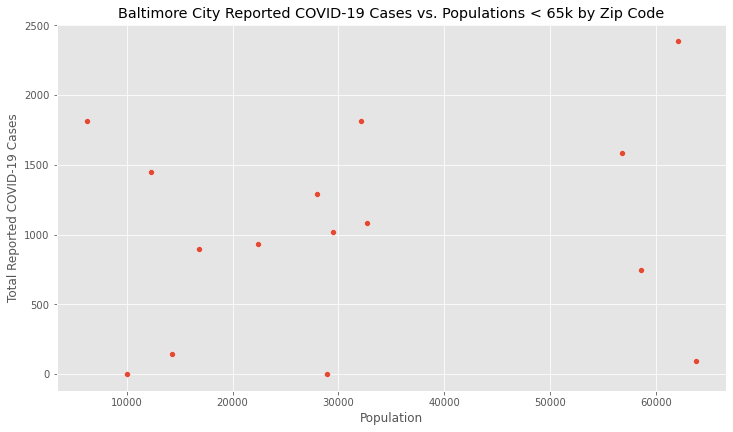

[[1.         0.16097816]
 [0.16097816 1.        ]]


In [8]:
pops_less_65k = latestCases[latestCases['Pop2010'] < 65000]
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='Pop2010',y='TotalCases',data=pops_less_65k,legend=False)
_ = plt.xlabel('Population')
_ = plt.ylabel('Total Reported COVID-19 Cases')
_ = plt.title('Baltimore City Reported COVID-19 Cases vs. Populations < 65k by Zip Code')
plt.show()

corr = np.corrcoef(pops_less_65k[['Pop2010','TotalCases']],rowvar=False)
print(corr)

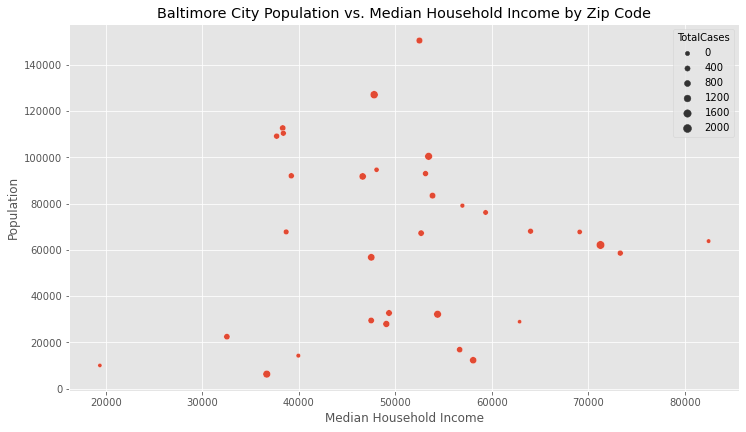

[[1.         0.05581215]
 [0.05581215 1.        ]]


In [9]:
_ = plt.figure(figsize=(12,6.75))
_ = plt.style.use('ggplot')
_ = sns.scatterplot(x='MHINC',y='Pop2010',data=latestCases,size='TotalCases',legend='brief')
_ = plt.xlabel('Median Household Income')
_ = plt.ylabel('Population')
_ = plt.title('Baltimore City Population vs. Median Household Income by Zip Code')
plt.show()

corr = np.corrcoef(latestCases[['Pop2010','MHINC']],rowvar=False)
print(corr)